## Notebook 3 : Correlations and relationship between variables

## 1 - Introduction ##

Overview of the notebook’s objective and the data used.


In [2]:
#### EXPLORING THE DATASET ####
import pandas as pd

# Read in the data
df_rv = pd.read_csv('df_complete.csv')

df_rv.head()

/var/folders/4w/14ckvblj1yxd9ft8451k6lhc0000gn/T/ipykernel_1296/2174705646.py:5: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_rv = pd.read_csv('df_complete.csv')


,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07 00:00:00.000000000,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07 00:00:00.000000000,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07 00:00:00.000000000,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07 00:00:00.000000000,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


In [3]:
#### CONVERTS TO THE RIGHT TYPE ####

category_convert = ['Nature mutation', 'Voie', 'Code postal', 'Commune', 'Code departement', 'Code commune', 'Code type local', 'Type local']
df_rv[category_convert] = df_rv[category_convert].astype('category')

df_rv['Date mutation'] = pd.to_datetime(df_rv['Date mutation'], errors = 'coerce')
df_rv['Date mutation'] = df_rv['Date mutation'].interpolate(method='linear')

df_rv['Valeur fonciere']=df_rv['Valeur fonciere'].replace({'\xa0':'',',':'.'}, regex=True)
df_rv['Valeur fonciere']=pd.to_numeric(df_rv['Valeur fonciere'], errors='coerce')

df_rv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17810875 entries, 0 to 17810874
Data columns (total 15 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   Date mutation              datetime64[ns]
 1   Nature mutation            category      
 2   Valeur fonciere            float64       
 3   Voie                       category      
 4   Code postal                category      
 5   Commune                    category      
 6   Code departement           category      
 7   Code commune               category      
 8   Nombre de lots             int64         
 9   Code type local            category      
 10  Type local                 category      
 11  Surface reelle bati        float64       
 12  Nombre pieces principales  float64       
 13  Surface terrain            float64       
 14  annee                      int64         
dtypes: category(8), datetime64[ns](1), float64(4), int64(2)
memory usage: 1.2 GB


In [4]:
#### CHECK MISSING VALUES ####
df_rv.isnull().sum()

Date mutation                0
Nature mutation              0
Valeur fonciere              0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Surface terrain              0
annee                        0
dtype: int64

In [5]:
#### CHECK DUPLICATES ####
#df_rv.drop_duplicates(keep='last', inplace=True)
df_rv.duplicated().sum()

0

In [6]:
df_rv.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019


## 2 - Methodology ##

Explanation of the analysis methods and visualizations.

Data Exploration:
- Analyze correlations between various variables (price vs. surface area, price vs. number of rooms, etc.).
- Study how certain factors (terrain size, property type) affect property values.

In [7]:
#### LIBRARIES ####
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
import random
from matplotlib import colors



In [8]:

#### SEPARATE OUTLIERS WITH IQR ####
Q1 = df_rv['Valeur fonciere'].quantile(0.25)
Q3 = df_rv['Valeur fonciere'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df_rv[(df_rv['Valeur fonciere'] < lower_bound) | (df_rv['Valeur fonciere'] > upper_bound)].copy()
non_outliers = df_rv[(df_rv['Valeur fonciere'] >= lower_bound) & (df_rv['Valeur fonciere'] <= upper_bound)].copy()

outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee
116,2019-03-07 00:00:00.000000000,Vente,3000000.0,DES ORMEAUX,1000.0,BOURG-EN-BRESSE,1,53,0,0.0,0,0.0,0.0,4253.0,2019
117,2019-03-07 00:00:00.000000000,Vente,3000000.0,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,0,4.0,Local industriel. commercial ou assimilé,2465.0,0.0,5926.0,2019
1059,2019-05-22 21:49:05.454545408,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,850.0,0.0,2108.0,2019
1060,2019-05-03 15:16:21.818181888,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,0.0,0,0.0,0.0,236.0,2019
1061,2019-04-14 08:43:38.181818112,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,80.0,0.0,982.0,2019


### Analyse of the tax transfert
Calculate mutation right in function of the nature of mutation.

- For those type of mutation (case 1) : 'Vente', 'Echange', 'Vente terrain à bâtir', 'Adjudication'

   * Formule generale (For all departments) : Valeur foncière x (4.5% + 1.2%) x 1.0237
   * Formule exception (departemnt : 36, 56) : Valeur foncière x (3.8% + 1.2%) x 1.0237

- For those type of mutation (case 2) : 'Vente en l'état futur d'achèvement'
   * Formule generale (For all departments) : Valeur foncière x 0.715%

- For those type of mutation (case 3) : 'Expropriation'
   * Vari in function of the type of exportation:
       - Formule generale (For all departments) + Formule exception (departemnt : 36, 56)
       - Delete the tax
       - Reduce the tax



In [9]:
#Calcul the tax transfert

#List of columns in function of the different case
columns_c1 = ['Vente', 'Echange', 'Vente terrain à bâtir', 'Adjudication']
columns_c2 = ["Vente en l'état futur d'achèvement"]

def tax_transfert_exp_null(df):

    #Columns that can change the formula
    valeur_fonciere = df['Valeur fonciere']
    code_dept = df['Code departement']
    nature_mutation = df['Nature mutation']

    #Calculate tax
    tax_dept = 4.5/100 if code_dept not in [36, 56] else 3.8/100
    tax_comm = 1.2/100

    if nature_mutation in columns_c1:
        return valeur_fonciere * (tax_dept + tax_comm) * 1.0237
    elif nature_mutation in columns_c2:
        return valeur_fonciere * 0.715/100
    else :
        return 0
    

non_outliers['Droit de mutation'] = non_outliers.apply(tax_transfert_exp_null, axis=1)
non_outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,Droit de mutation
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,14249.289780
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,11378.425500
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,11378.425500
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,6420.349527
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019,9362.401905


In [10]:
outliers['Droit de mutation'] = outliers.apply(tax_transfert_exp_null, axis=1)
outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,Droit de mutation
116,2019-03-07 00:00:00.000000000,Vente,3000000.0,DES ORMEAUX,1000.0,BOURG-EN-BRESSE,1,53,0,0.0,0,0.0,0.0,4253.0,2019,175052.7000
117,2019-03-07 00:00:00.000000000,Vente,3000000.0,MARECHAL JUIN,1000.0,BOURG-EN-BRESSE,1,53,0,4.0,Local industriel. commercial ou assimilé,2465.0,0.0,5926.0,2019,175052.7000
1059,2019-05-22 21:49:05.454545408,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,850.0,0.0,2108.0,2019,36469.3125
1060,2019-05-03 15:16:21.818181888,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,0.0,0,0.0,0.0,236.0,2019,36469.3125
1061,2019-04-14 08:43:38.181818112,Vente,625000.0,GABRIEL VICAIRE,1160.0,PONT-D AIN,1,304,0,4.0,Local industriel. commercial ou assimilé,80.0,0.0,982.0,2019,36469.3125


In [11]:
#Add a columns that calculate the sum of land value and tax.
outliers['Valeur fonciere + tax de mutation'] = outliers['Droit de mutation'] + outliers['Valeur fonciere']
outliers.head()

non_outliers['Valeur fonciere + tax de mutation'] = non_outliers['Droit de mutation'] + non_outliers['Valeur fonciere']
non_outliers.head()

,Date mutation,Nature mutation,Valeur fonciere,Voie,Code postal,Commune,Code departement,Code commune,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Surface terrain,annee,Droit de mutation,Valeur fonciere + tax de mutation
0,2019-01-07,Vente,244200.0,COMMANDANT COUSTEAU,1000.0,BOURG-EN-BRESSE,1,53,0,1.0,Maison,150.0,5.0,695.0,2019,14249.289780,258449.289780
1,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,888.0,2019,11378.425500,206378.425500
2,2019-04-07,Vente,195000.0,DE LA CROIX ROSIER,1250.0,HAUTECOURT-ROMANECHE,1,184,0,1.0,Maison,94.0,4.0,500.0,2019,11378.425500,206378.425500
3,2019-04-07,Vente,110030.0,LA VILLE,1250.0,GRAND-CORENT,1,177,0,1.0,Maison,90.0,3.0,522.0,2019,6420.349527,116450.349527
4,2019-03-07,Vente,160450.0,CHARBONNET,1270.0,COLIGNY,1,108,0,0.0,0,0.0,0.0,8.0,2019,9362.401905,169812.401905


### Data exploration of multivariable : ungraphical and graphical variable 

Create a statistical table for ouliers and non_outliers data

In [12]:
# Statistique data of non_outliers
colummns_stat = ['Valeur fonciere','Valeur fonciere + tax de mutation','Surface reelle bati','Surface terrain']
mean = non_outliers[colummns_stat].mean()
maxi = non_outliers[colummns_stat].max()
mini = non_outliers[colummns_stat].min()
median = non_outliers[colummns_stat].median()

stat_columns = pd.DataFrame({
    'mean': mean,
    'median': median,
    'max': maxi,
    'min': mini
})
stat_columns.index.name='feature name'

stat_columns.head()

,mean,median,max,min
feature name,,,,
Valeur fonciere,163822.060283,138650.0000,6.062500e+05,0.0
Valeur fonciere + tax de mutation,172900.936398,146052.4242,6.416252e+05,0.0
Surface reelle bati,36.465759,0.0000,4.500000e+05,0.0
Surface terrain,1829.699058,287.0000,1.072309e+07,0.0


In [13]:
# Statistique data of outliers
colummns_stat_outliers = ['Valeur fonciere','Valeur fonciere + tax de mutation','Surface reelle bati','Surface terrain']
mean = outliers[colummns_stat].mean()
maxi = outliers[colummns_stat].max()
mini = outliers[colummns_stat].min()
median = outliers[colummns_stat].median()

colummns_stat_outliers = pd.DataFrame({
    'mean': mean,
    'median': median,
    'max': maxi,
    'min': mini
})
colummns_stat_outliers.index.name='feature name'

colummns_stat_outliers.head()

,mean,median,max,min
feature name,,,,
Valeur fonciere,5.559429e+06,1.030000e+06,1.415000e+10,606255.00000
Valeur fonciere + tax de mutation,5.857671e+06,1.087032e+06,1.497566e+10,610621.75062
Surface reelle bati,1.446187e+02,0.000000e+00,3.129620e+05,0.00000
Surface terrain,3.797640e+03,5.000000e+02,6.032439e+06,0.00000


## 3 - Results ##

Presentation of the analyses, visualizations, and findings.

Visualizations:
- Heatmap of correlations between variables.
- Scatter plots to visualize relationships between certain variables, such as built area and property value.

## Which Type of Property Is the Most Profitable for Real Estate Investment? 

To address this question, we analyzed the relationship between property characteristics and land value. The goal is to identify the factors that most influence property value and guide investments toward the most profitable opportunities. 

### Analyse of the relationship between property type and land value

In [14]:
# Filtrer property where surfaces is zéro
non_outliers_not_empty = non_outliers[non_outliers['Surface terrain']!=0.0]
non_outliers_not_empty = non_outliers_not_empty[non_outliers_not_empty['Valeur fonciere']!=0.0]
non_outliers_not_empty = non_outliers_not_empty[non_outliers_not_empty['Surface reelle bati']!=0.0]

print(non_outliers.shape)
print(non_outliers_not_empty.shape)

(16452481, 17)
(3678482, 17)


<Figure size 4000x1500 with 0 Axes>

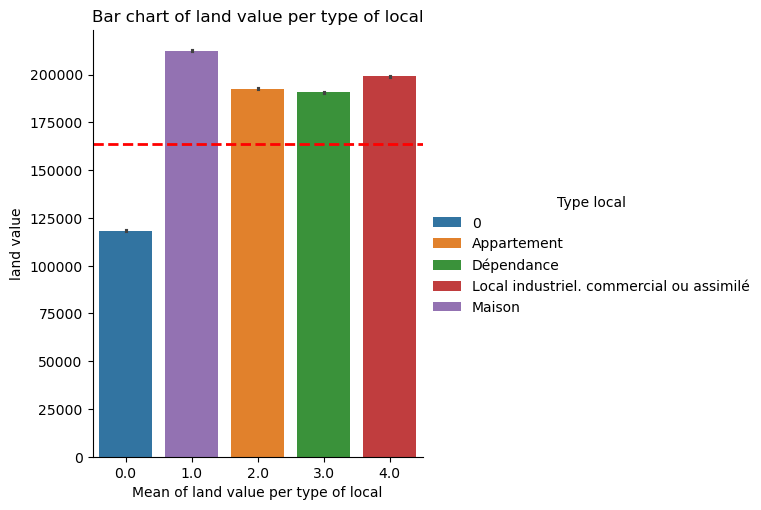

In [ ]:
#### non_outliers #########
#Calculate the mean of land value per type of location

#Create bar plot
plt.figure(figsize=(40,15))
sns.catplot(
    data=non_outliers,
    x='Code type local', 
    y='Valeur fonciere', 
    hue='Type local', 
    kind="bar", 
    legend="brief")


#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
plt.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

#Add label
plt.title("Bar chart of land value per type of local - non outliers")
plt.xlabel("Mean of land value per type of local")
plt.ylabel("Land value")
plt.show()

#### Analyse: 


By examining the average land value for each property type, we observe that only vacant land consistently falls below the market average. This suggests that having a building on the property significantly increases its value.

<Figure size 4000x1500 with 0 Axes>

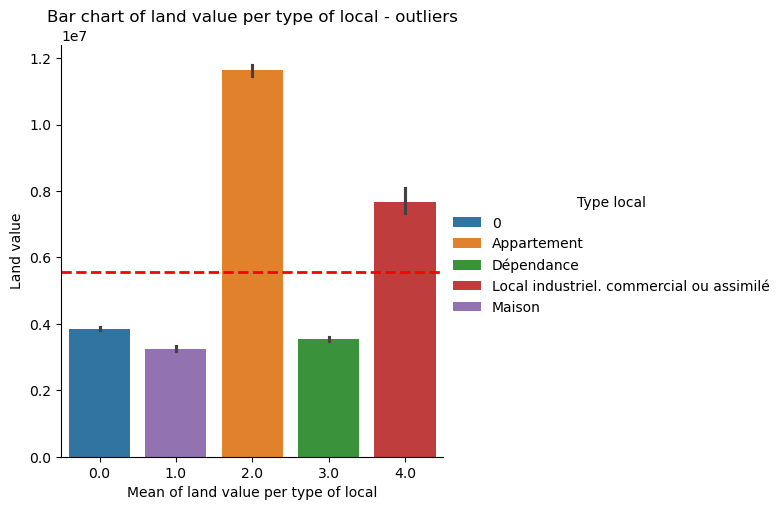

In [16]:
#### outliers #########
#Calculate the mean of land value per type of location

#Create box plot
plt.figure(figsize=(40,15))
sns.catplot(
    data=outliers, 
    x='Code type local', 
    y='Valeur fonciere', 
    hue='Type local', 
    kind="bar", 
    legend="brief")


#Create horizontale line that are the mean of land value
mean_land_value = colummns_stat_outliers.loc['Valeur fonciere', 'mean']
plt.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

#Add label
plt.title("Bar chart of land value per type of local - outliers")
plt.xlabel("Mean of land value per type of local")
plt.ylabel("Land value")
plt.show()

#### Analyse:

A focused analysis on outlier properties reveals that some built and unbuilt properties still fall below the market average land value. Interestingly, vacant plots are not always the cheapest options. This indicates that property type alone does not strongly dictate land value.

### Analyse of the impact of Room Count on land value


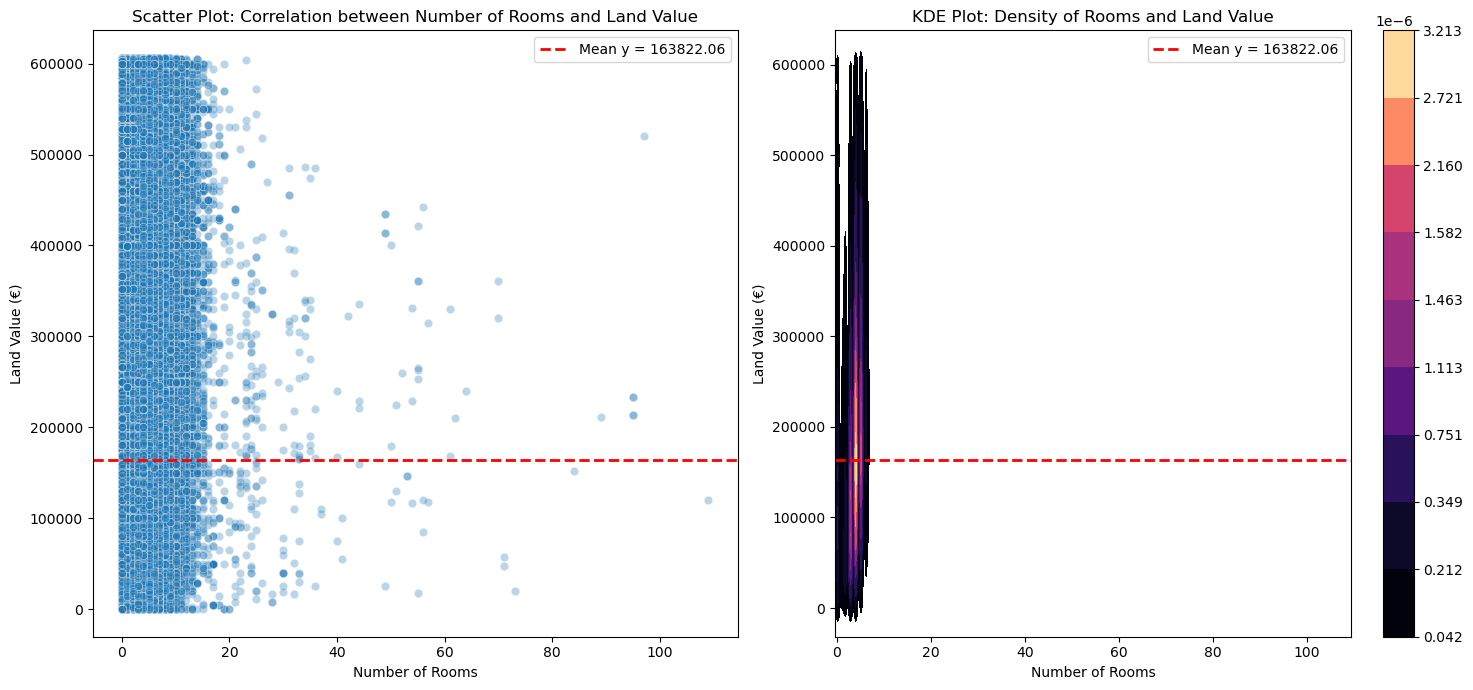

In [21]:
###### non outlier ######
# Create subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# --- Scatter plot (ax1) ---
sns.scatterplot(
    data=non_outliers_not_empty,
    x='Nombre pieces principales',
    y='Valeur fonciere',
    alpha=0.3,
    ax=ax1
)

# Add horizontale line that show the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
ax1.axhline(
    mean_land_value,
    color='red',
    linestyle="--",
    linewidth=2,
    label=f"Mean y = {mean_land_value:.2f}"
)

# Add labels and title
ax1.set_title("Scatter Plot: Correlation between Number of Rooms and Land Value")
ax1.set_xlabel("Number of Rooms")
ax1.set_ylabel("Land Value (€)")
ax1.legend()

# --- KDE plot (ax2) ---
sns.kdeplot(
    data=non_outliers_not_empty,
    x='Nombre pieces principales',
    y='Valeur fonciere',
    fill=True,
    cmap='magma',
    cbar=True,
    cbar_kws={'orientation': 'vertical'},
    ax=ax2
)

# Ajouter une ligne horizontale représentant la moyenne de la valeur foncière
ax2.axhline(
    mean_land_value,
    color='red',
    linestyle="--",
    linewidth=2,
    label=f"Mean y = {mean_land_value:.2f}"
)

# Ajouter des labels et un titre
ax2.set_title("KDE Plot: Density of Rooms and Land Value")
ax2.set_xlabel("Number of Rooms")
ax2.set_ylabel("Land Value (€)")
ax2.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()

#### Analyse : 

Scatter Plot: 
Each point represents a property, showing its number of rooms (x-axis) versus its land value (y-axis). 
Properties with more than 20 rooms tend to cluster above the average land value (indicated by the red dashed line). This suggests that larger properties (in terms of room count) are generally associated with higher land values. 
The high density of points in the range of 0 to 20 rooms makes this area harder to interpret, as it overlaps significantly. 

KDE Plot: 
The Kernel Density Estimation (KDE) plot provides a clearer view of property density. The lighter the color, the higher the density of properties in that range. 
Most properties are concentrated near the origin of the x-axis (few rooms) and are below the average land value. 
The diagonal shift in density suggests that as the number of rooms increases, the land value also tends to increase, highlighting a relationship between room count and property value. 

Conclusions: 
Higher room counts correlate with higher land values, particularly when outliers are excluded. 
For smaller properties, room count alone may not adequately explain land value due to high data density and potential confounding factors.  

## Analyse of the relationship between land value and surface areas 

Key Factors: 
 - Building surface area 
 - Land surface area 

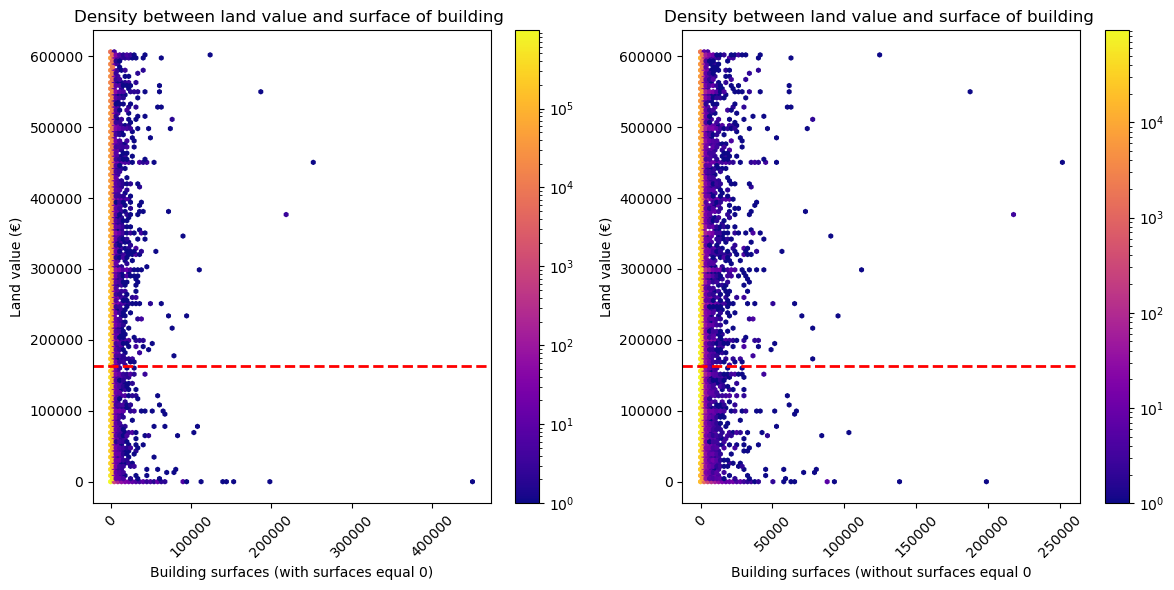

In [ ]:
#### non outliers ####
# General view : Property surfaces

#Create frame with 1 row and 2 columns
figure, (axis1, axis2) = plt.subplots(1,2, figsize=(12,6))


# ---- Hexbin without surfaces equale 0 ----- #
hbar1 = axis1.hexbin(non_outliers['Surface reelle bati'], non_outliers['Valeur fonciere'], gridsize=(100,70), mincnt=1,bins='log', cmap='plasma')

mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axis1.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

# create a colorbar
plt.colorbar(hbar1, ax=axis1)

axis1.set_title("Density between land value and surface of building ")
axis1.set_xlabel("Building surfaces (with surfaces equal 0)")
axis1.tick_params(axis='x', rotation=45)
axis1.set_ylabel("Land value (€)")



# ---- Hexbin with surfaces equale 0 ----- #
hbar2 = axis2.hexbin(non_outliers_not_empty['Surface reelle bati'], non_outliers_not_empty['Valeur fonciere'], gridsize=(100,70), mincnt=1, bins='log', cmap= 'plasma')

# create a colorbar
plt.colorbar(hbar2, ax=axis2)

axis2.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")


axis2.set_title("Density between land value and surface of building ")
axis2.set_xlabel("Building surfaces (without surfaces equal 0)")
axis2.tick_params(axis='x', rotation=45)
axis2.set_ylabel("Land value (€)")


plt.tight_layout()
plt.show()


##### Analyse:

Hexagonal Binning Plot: This visualization divides the data into hexagonal grids, where lighter colors represent higher property densities. 
The filtered plot (excluding zero building surfaces) highlights that as building surface area increases, fewer properties fall below the average land value. 

Influence of building surface: Larger building surface is associated with higher land values. 

Comparaison of property surface per local type
  - apartment
  - home
  - dependence
  - industri

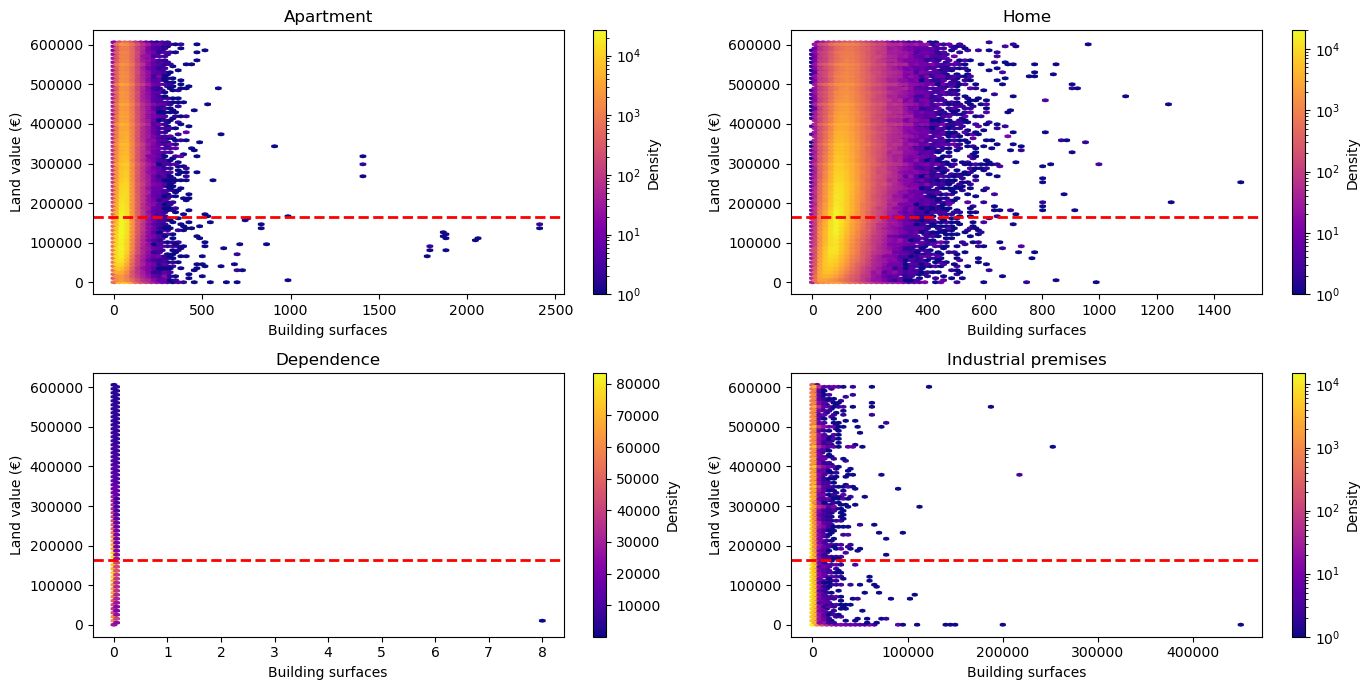

In [62]:
#### non outliers ####
# Specifique view : Property surfaces

fig1, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2, figsize=(14,7))
plt.title("Density between land value and surface ", loc='center')

# -----Subplot Apartement ----- #
appartement = non_outliers[non_outliers['Type local']=='Appartement']

#Create hexbin plot
hb1 = axs1.hexbin(
    appartement['Surface reelle bati'], 
    appartement['Valeur fonciere'], 
    gridsize=(80,60), 
    mincnt=1, 
    bins='log', 
    cmap='plasma')

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axs1.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

# create a colorbar
plt.colorbar(hb1,label='Density', ax=axs1)

axs1.set_title('Apartment')
axs1.set_xlabel("Building surfaces")
axs1.set_ylabel("Land value (€)")

# -----Subplot Home ----- #
maison = non_outliers[non_outliers['Type local']=='Maison']

#Create hexbin plot
hb2 = axs2.hexbin(
    maison['Surface reelle bati'], 
    maison['Valeur fonciere'], 
    gridsize=(80,60), 
    mincnt=1, 
    bins='log', 
    cmap='plasma')

#Create horizontale line that are the mean of land value
axs2.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

# create a colorbar
plt.colorbar(hb2,label='Density', ax=axs2)

axs2.set_title('Home')
axs2.set_xlabel("Building surfaces")
axs2.set_ylabel("Land value (€)")

# -----Subplot Dependence ----- #
dependance = non_outliers[non_outliers['Type local']=='Dépendance']

#Create hexbin plot
hb3 = axs3.hexbin(
    dependance['Surface reelle bati'], 
    dependance['Valeur fonciere'], 
    gridsize=(80,60), 
    mincnt=1, 
    cmap='plasma')

#Create horizontale line that are the mean of land value
axs3.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

# create a colorbar
plt.colorbar(hb3,label='Density', ax=axs3)

axs3.set_title('Dependence')
axs3.set_xlabel("Building surfaces")
axs3.set_ylabel("Land value (€)")

# -----Subplot Industi premise ----- #
Local_industri = non_outliers[non_outliers['Type local']=='Local industriel. commercial ou assimilé']

#Create hexbin plot
hb4 = axs4.hexbin(
    Local_industri['Surface reelle bati'], 
    Local_industri['Valeur fonciere'], 
    gridsize=(90,60), 
    mincnt=1, 
    bins='log', 
    cmap='plasma')

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axs4.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

# create a colorbar
plt.colorbar(hb4,label='Density', ax=axs4)

axs4.set_title('Industrial premises')
axs4.set_xlabel("Building surfaces")

axs4.set_ylabel("Land value (€)")

#Add label
plt.tight_layout()
plt.show()

#### Analyse:
Comparison by Property Type: 
1. Apartments 
 Land value increases with larger surfaces; most values cluster below €200,000. 
 Larger apartments (>500 m²) are better investments for higher land value returns. 
2. Houses 
 Positive correlation between building surface and land value, especially for surfaces >600 m². 
 Focus on houses with larger surfaces for greater value appreciation. 
3. Dependencies 
 Minimal variation in land value; surfaces remain small (<10 m²). 
 Value is likely driven by external factors, not surface area. 
4. Industrial Premises 
 Highly variable land values; large surfaces (>100,000 m²) do not guarantee higher values. 
 Location and use case matter more than surface. 
General Observations: 

Land Value Threshold: Across all property types, €200,000 appears to act as a significant threshold, with most properties falling below this value. Properties exceeding this limit are likely influenced by additional factors (e.g., premium locations, specific market demand). 

Building Surface Impact:  
Stronger correlation with land value for residential properties (apartments, houses). 
Weaker or negligible impact for dependencies and industrial premises, where other variables dominate. 
 

Recommendations: 

 - For Residential Investments:  
Focus on larger building surfaces, particularly in the 500-1,500 m² range for houses and apartments, where the return on land value is most evident. 
- For Dependencies and Industrial Premises:  
Prioritize external evaluations (e.g., zoning laws, geographic location) as building surface is not a decisive factor for these property types. 


Comparaison of Land surfaces
 - view without empty land
 - view with empty land

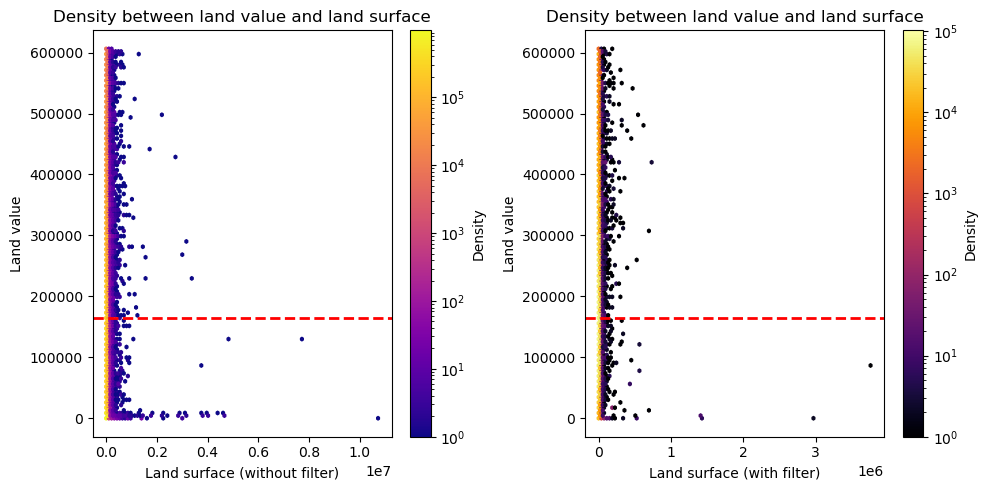

In [ ]:
#### non outliers ####
# General view : Land surfaces

#Create frame with 1 row and 2 columns
figure, (axis1, axis2) = plt.subplots(1,2, figsize=(10,5))

#Create hexbin plot
HB1= axis1.hexbin(
    non_outliers['Surface terrain'], 
    non_outliers['Valeur fonciere'], 
    gridsize=(100,70), 
    mincnt=1, 
    bins='log', 
    cmap='inferno')

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axis1.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

#Create color bar
plt.colorbar(HB1, label='Density', ax=axis1)

#Add labels
axis1.set_title("Density between land value and land surface")
axis1.set_xlabel("Land surface (without filter)")
axis1.set_ylabel("Land value ")

#Create hexbin plot
HB2 = axis2.hexbin(
    non_outliers_not_empty['Surface terrain'], 
    non_outliers_not_empty['Valeur fonciere'], 
    gridsize=(100,70), 
    mincnt=1, 
    bins='log', 
    cmap='inferno')

#Create horizontale line that are the mean of land value
axis2.axhline(mean_land_value, color = 'red', 
            linestyle="--", linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")

#Create color bar
plt.colorbar(HB2, label='Density', ax=axis2)

#Add labels
axis2.set_title("Density between land value and land surface")
axis2.set_xlabel("Land surface (with filter)")
axis2.set_ylabel("Land value")


plt.tight_layout()
plt.show()


#### Analyse:

Concentration of properties near the origin: 
There is a high density of properties with small land surfaces and land values below or near the average (marked by the red line). 
This suggests that the majority of properties have small land areas, likely corresponding to urban plots or low-cost properties.

Impact of filtering zero surfaces: 
In the unfiltered graph (left), properties with zero land surface are included, introducing noise and skewing the interpretation. 
The filtered graph (right) provides a clearer view, allowing the direct relationship between land surface and land value to emerge more clearly. 


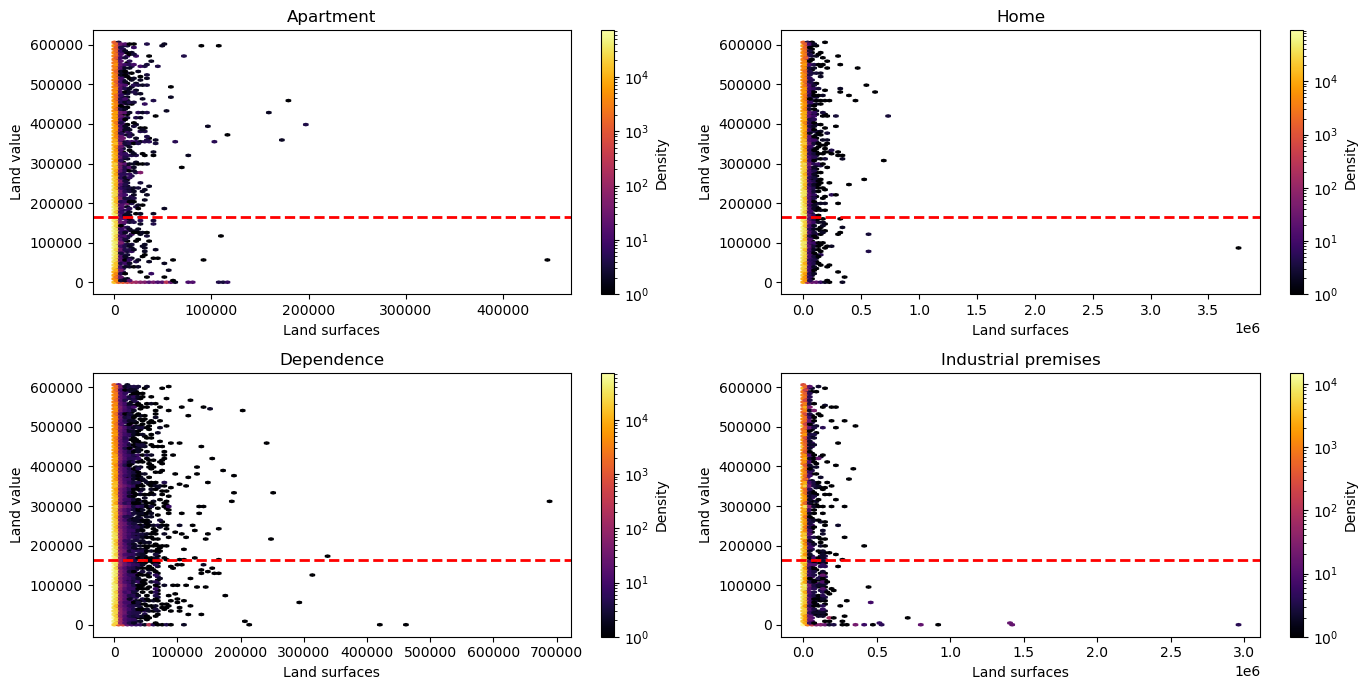

In [64]:
### non outliers ####
#Specifique view : Area Surfaces

#Create frame with 2 row and 2 columns
fig1, ((axs1, axs2), (axs3, axs4)) = plt.subplots(2, 2, figsize=(14,7))
plt.title("Density between land value and surface ", loc='center')

# -----Subplot Apartement ----- #
appartement = non_outliers[non_outliers['Type local']=='Appartement']

#Create hexbin plot
hb1 = axs1.hexbin(
    appartement['Surface terrain'], 
    appartement['Valeur fonciere'], 
    gridsize=(100,70), 
    mincnt=1, 
    bins='log', 
    cmap='inferno')

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axs1.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

#Create color bar
plt.colorbar(hb1, label='Density', ax=axs1)

axs1.set_title('Apartment')
axs1.set_xlabel("Land surfaces")
axs1.set_ylabel("Land value")

# -----Subplot Home ----- #
maison = non_outliers[non_outliers['Type local']=='Maison']

#Create hexbin plot
hb2 = axs2.hexbin(
    maison['Surface terrain'], 
    maison['Valeur fonciere'], 
    gridsize=(100,70), 
    mincnt=1, 
    bins='log', 
    cmap='inferno')

#Create horizontale line that are the mean of land value
axs2.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

#Create color bar
plt.colorbar(hb2, label='Density', ax=axs2)

axs2.set_title('Home')
axs2.set_xlabel("Land surfaces")
axs2.set_ylabel("Land value")

# -----Subplot Dependence ----- #
dependance = non_outliers[non_outliers['Type local']=='Dépendance']

#Create hexbin plot
hb3 = axs3.hexbin(
    dependance['Surface terrain'], 
    dependance['Valeur fonciere'], 
    gridsize=(100,70), 
    mincnt=1, 
    bins='log', 
    cmap='inferno')

#Create horizontale line that are the mean of land value
axs3.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

#Create color bar
plt.colorbar(hb3, label='Density', ax=axs3)

axs3.set_title('Dependence')
axs3.set_xlabel("Land surfaces")
axs3.set_ylabel("Land value")

# -----Subplot Industi premise ----- #
Local_industri = non_outliers[non_outliers['Type local']=='Local industriel. commercial ou assimilé']

#Create hexbin plot
hb4 = axs4.hexbin(
    Local_industri['Surface terrain'], 
    Local_industri['Valeur fonciere'], 
    gridsize=(100,70), 
    mincnt=1, 
    bins='log', 
    cmap='inferno')

#Create horizontale line that are the mean of land value
mean_land_value = stat_columns.loc['Valeur fonciere', 'mean']
axs4.axhline(
    mean_land_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

#Create color bar
plt.colorbar(hb4, label='Density', ax=axs4)

axs4.set_title('Industrial premises')
axs4.set_xlabel("Land surfaces")
axs4.set_ylabel("Land value")

#Add label
plt.tight_layout()
plt.show()

#### Analyse:

Comparison by property type: 
1. Fo apartments, land areas are small, with a high density of properties concentrated at lower values (consistent with urban environments where apartments occupy limited space). 
2. Houses show a wider range of land surfaces, with values increasing progressively as surface size increases. 
3. Dependencies and industrial premises show more dispersion, but the density remains focused around smaller surfaces. Notably, some industrial premises can reach very high land values for moderate-sized plots. 
 
 
Influence of land surface on land value: 
As the land surface increases, the land value generally increases. This observation aligns with the common assumption that larger plots are more expensive. 
However, the density decreases for larger surfaces, indicating that large plots of land are relatively rare. 
The high density near the origin indicates that a large number of transactions involve small and low-value plots. 

## Analysis of the Impact of Mutation Nature on Land Value 

Relationship Between Mutation Nature, Land Surface, and Value 

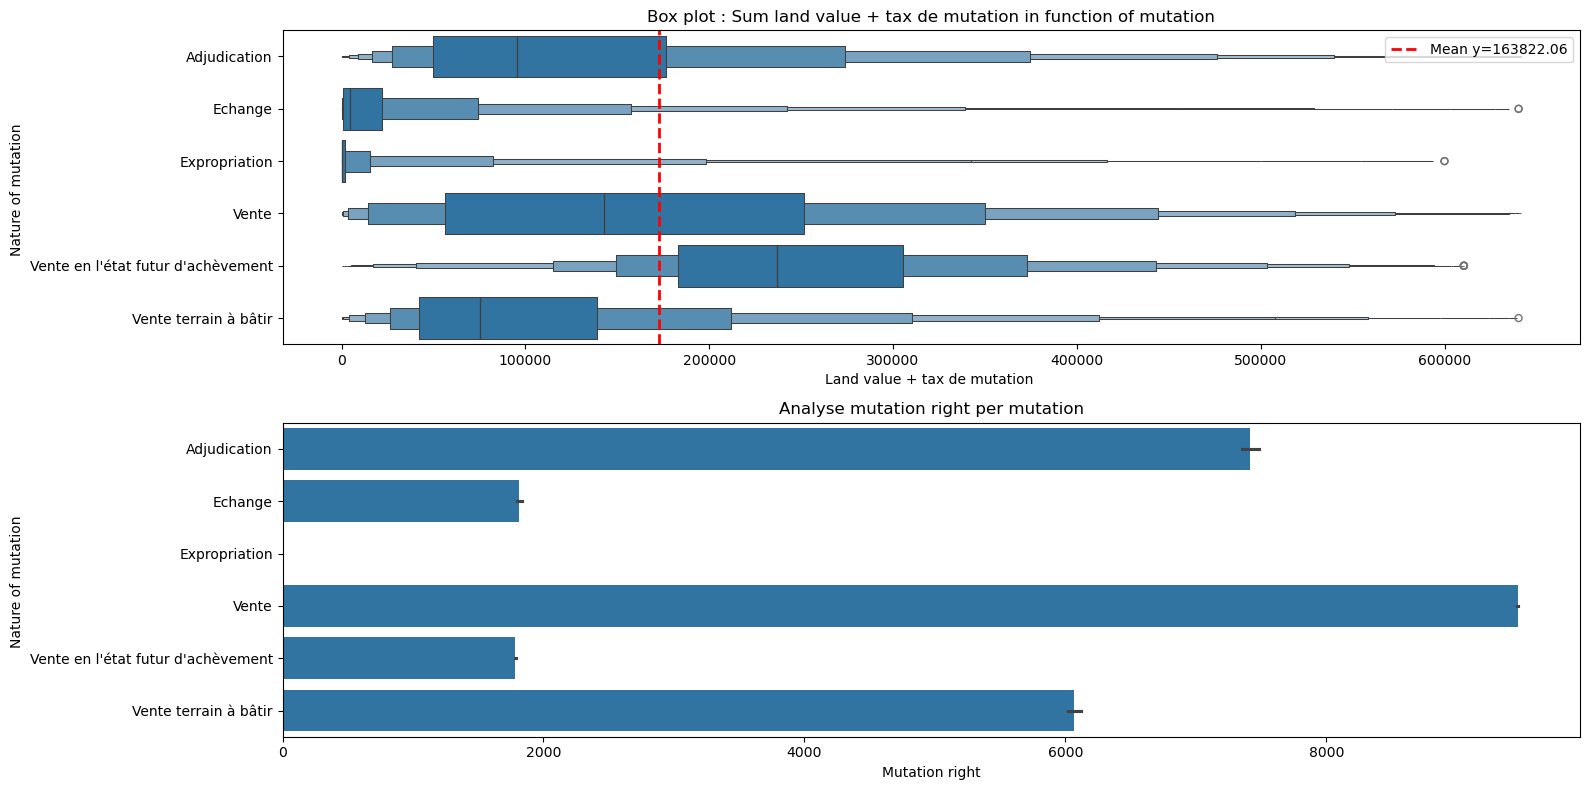

In [30]:
### non outliers : General view ###

#Create frame with 1 row and 2 columns
figure, (axi1, axi2) = plt.subplots(2,1, figsize=(16,8))

#---- subplot 0.0 -----#

#Create a box plot of mutation without empty land in row 1
sns.boxenplot(
    data=non_outliers, 
    x='Valeur fonciere + tax de mutation', 
    y='Nature mutation',
    ax=axi1)

#Add line that are the mean of land value
mean_cost_value = stat_columns.loc['Valeur fonciere + tax de mutation', 'mean']
axi1.axvline(
    mean_cost_value, 
    color = 'red', 
    linestyle="--", 
    linewidth=2, 
    label=f"Mean y={mean_land_value:.2f}")

#Add labels
axi1.set_title("Box plot : Sum land value + tax de mutation in function of mutation")
axi1.set_xlabel("Land value + tax de mutation ")
axi1.set_ylabel("Nature of mutation ")
axi1.legend()

#---- subplot 1.0 -----#

#Create a box plot of mutation without empty land in row 1
sns.barplot(
    data=non_outliers,
    y= 'Nature mutation',
    x='Droit de mutation',
    ax=axi2)

#Add labels
axi2.set_title("Analyse mutation right per mutation")
axi2.set_ylabel("Nature of mutation ")
axi2.set_xlabel("Mutation right")


plt.tight_layout()
plt.show()

#### Analyse

This box plot displays the distribution of the total land value (sum of land value + transfer tax) across different types of mutations. 

**Interpretation:** 
The red vertical line indicates the market average for the total land value and transfer tax (163,822.06). 
Each box plot represents the spread (from minimum to maximum values) and the median (horizontal line within each box) for each mutation type.

**Graph 1:**
Sales and sales in future completion present higher variability.
Sale have a wide range of value but the median is below the average of the total cost. For sales in future completion, the median is above the market average, indicating its significant value contribution.

Mutations like, exchange, and expropriation are tied to lower-value transactions, making them less competitive in terms of total value. 

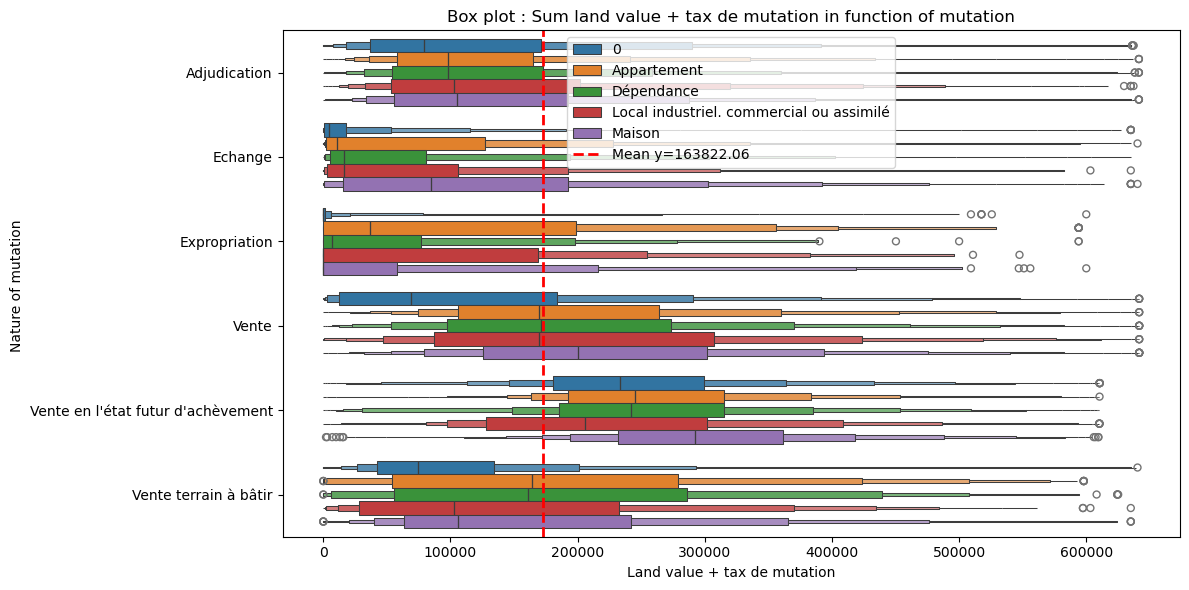

In [ ]:
#---- subplot 0.0 -----#

#Create a bax plot of mutation without empty land in row 2
plt.figure(figsize=(12,6))
sns.boxenplot(
    data=non_outliers,
    x='Valeur fonciere + mutation tax', 
    y='Nature mutation',
    hue='Type local')

mean_cost_value = stat_columns.loc['Valeur fonciere + tax de mutation', 'mean']
plt.axvline(mean_cost_value, 
             color = 'red', 
            linestyle="--", 
            linewidth=2, 
            label=f"Mean y={mean_land_value:.2f}")
#Add labels
plt.title("Box plot : Sum land value + mutation tax in function of mutation")
plt.xlabel("Land value + mutation tax")
plt.ylabel("Nature of mutation ")
plt.legend()

plt.tight_layout()
plt.show()


#### Analyse

This bar chart visualizes the average transfer tax (mutation rights) for each type of mutation. 

- **Interpretation:**
The bar heights represent the average transfer tax for each mutation type. 
The error bars provide an estimate of variability or uncertainty in the transfer tax values. 

- **Graph 2:**
Sales and land sales have the highest mutation rights, making them the most significant contributors to government revenue from transfer taxes.  
Lower mutation rights in exchange, and expropriation suggest these transactions are less financially impactful on a large scale. 

## 4 - Conlusion and recommandations ##

Summary of discoveries and investment advice.

Conclusions:
- Summarize significant relationships between variables that impact property values.
- Identify key factors to monitor when predicting property values.

Recommendations:
- Investment advice on what factors to prioritize when evaluating properties (e.g., emphasis on surface area or location).
- Suggestions for investing in areas where the correlation factors are favorable.

### Conclusion and Investment Advice 

**Property Type:** 
Vacant land generally has lower land value, but property type alone is not a decisive factor

**Room Count:** 
Properties with more than 20 rooms typically surpass the average land value. 
Room count has a direct, positive correlation with land value, particularly for larger properties.

**Building and Land Surface:** 
Apartments and Houses: Larger surfaces (>500 m² for apartments, >600 m² for houses) significantly increase land value. 
Dependencies and Industrial Premises: Surface has minimal impact; external factors like location play a larger role. 

**Mutation Type:** 
Future Completion Sales and Land Sales are characterized by high total values and substantial transfer taxes. These categories are most suited for large-scale investments targeting high-value returns. 

Mutation rights are highest for land sales but come with higher associated costs.
Mutation taxes for sales are the highest among all mutation types. And the sum of land value and tax for sales hight range of values but the total value is below the average market

**General:** 
Larger land surfaces and higher room counts are strong predictors of higher land value. 
Properties below €200,000 dominate the dataset, but premium value properties exceed this threshold based on specific features. 


### Investment Recommendation: 

* Residential Investments: 
  - Focus on houses and apartments with larger building surfaces and higher room counts.
  - Even though sales have a median total value below the market average, they present opportunities for investment, particularly in residential properties with minimal renovation costs.  

* Dependencies and Industrial Premises: 
  Focus on Location. Prioritize properties in strategic locations over large surface areas. 
 
* Land Sales: 
  Exercise caution due to high variability in land value and mutation costs. Investigate the potential for future development or resale. 
 
### Investment Strategy 

* To maximize profitability: 
  - Prioritize residential properties with large building surfaces and multiple rooms. 
  - Consider land sale only if it aligns with development goals and cost-benefit analysis.
  - A balanced strategy prioritizing residential properties (either sales or sales in future completion state) while considering transfer tax costs and potential savings on renovations would be the most effective way to maximize returns. 

